In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pickle_path = "../data/processed/data_for_model.pck"

# Load the pickle file
with open(pickle_path, 'rb') as f:
    data = pickle.load(f)

In [488]:
print(data.describe())

            host_id  host_response_rate  host_acceptance_rate  \
count  8.029000e+03         7578.000000           7819.000000   
mean   1.834477e+08            0.967210              0.927790   
std    1.919320e+08            0.141744              0.186881   
min    5.282000e+03            0.000000              0.000000   
25%    1.885413e+07            1.000000              0.970000   
50%    9.476865e+07            1.000000              1.000000   
75%    3.481599e+08            1.000000              1.000000   
max    5.685152e+08            1.000000              1.000000   

       host_is_superhost  host_listings_count  host_has_profile_pic  \
count        8004.000000          8029.000000           8029.000000   
mean            0.439780            23.678167              0.973098   
std             0.496391            69.506577              0.161809   
min             0.000000             0.000000              0.000000   
25%             0.000000             2.000000              

In [489]:
# Select numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Get column names for binary columns
binary_columns = [col for col in numeric_columns.columns if numeric_columns[col].nunique() == 2]

# Remove binary columns from numeric_columns
numeric_columns = numeric_columns.drop(columns=binary_columns)

# Select categorical columns
categorical_columns = data.select_dtypes(include=['category'])

print(binary_columns)
print(numeric_columns.columns)
print(categorical_columns.columns)

['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']
Index(['host_id', 'host_response_rate', 'host_acceptance_rate',
       'host_listings_count', 'accommodates', 'bathrooms', 'bathrooms_text',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'reviews_per_month', 'amenities_count', 'count_verifications',
       'seasonal_availability', 'min_rating', 'max_rating',
       'distance_from_city_centre'],
      dtype='object')
Index(['host_response_time', 'neighbourhood_cleansed', 'room_type', 'season'], dtype='object')


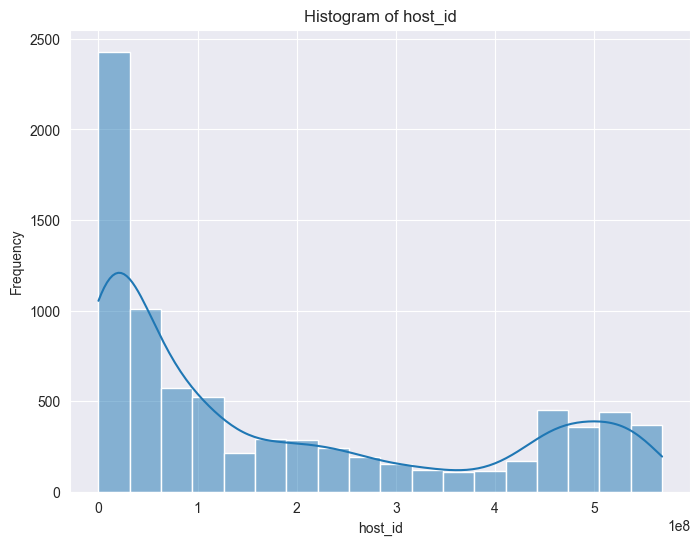

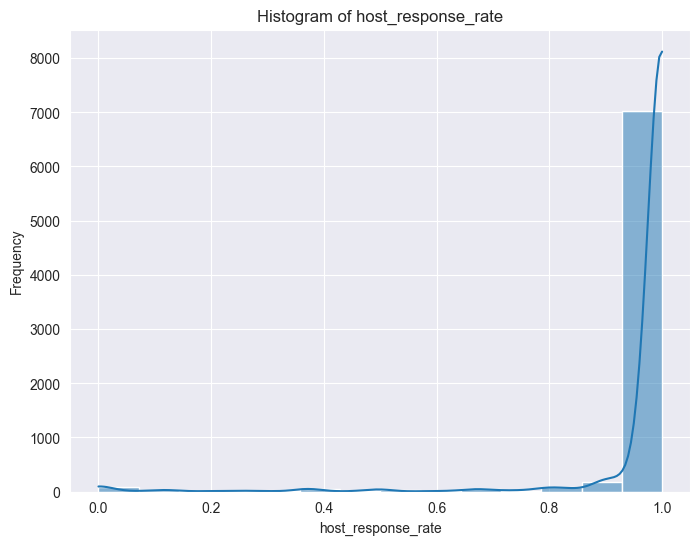

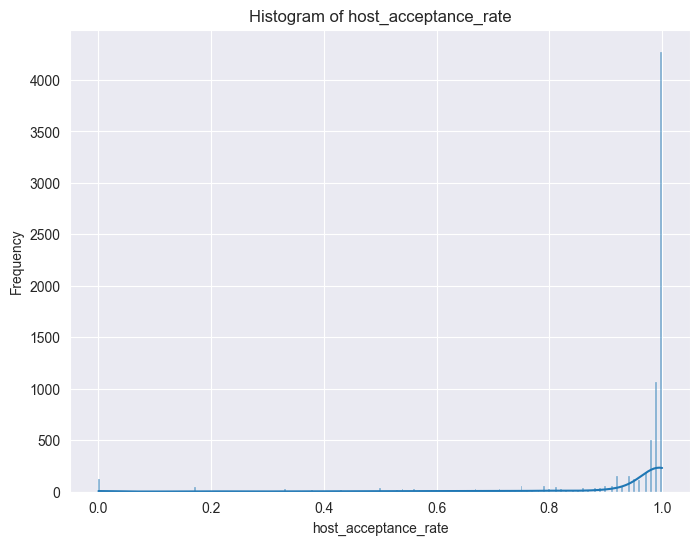

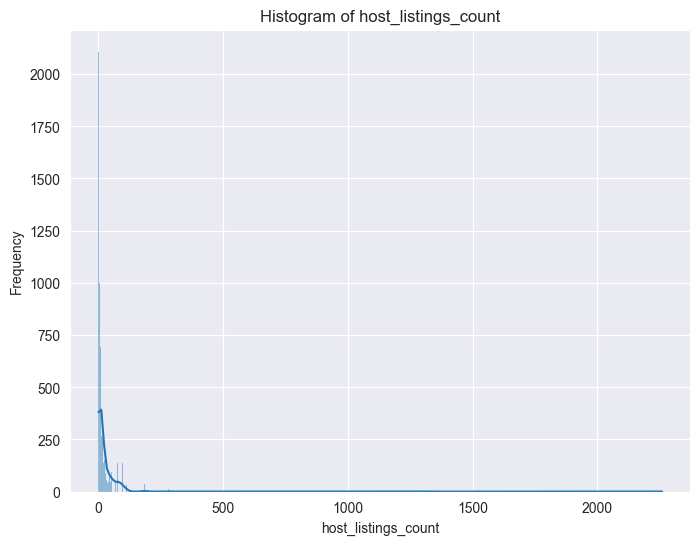

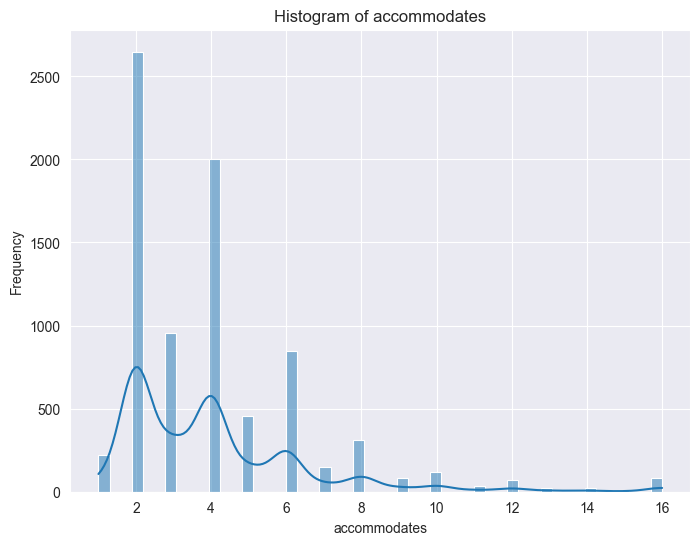

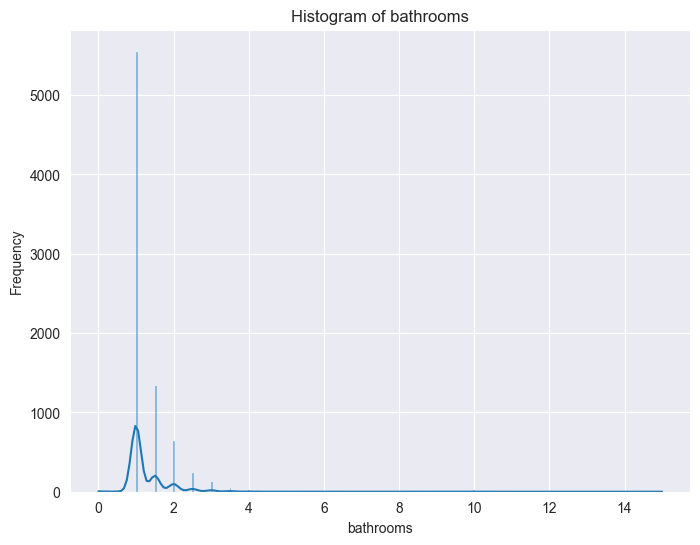

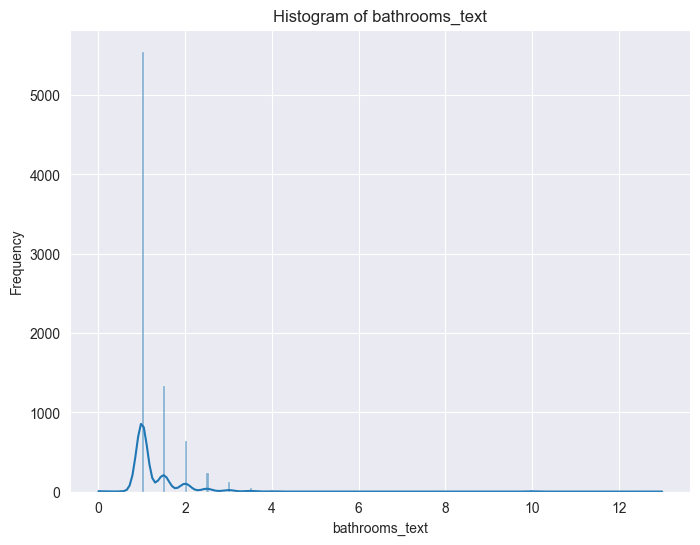

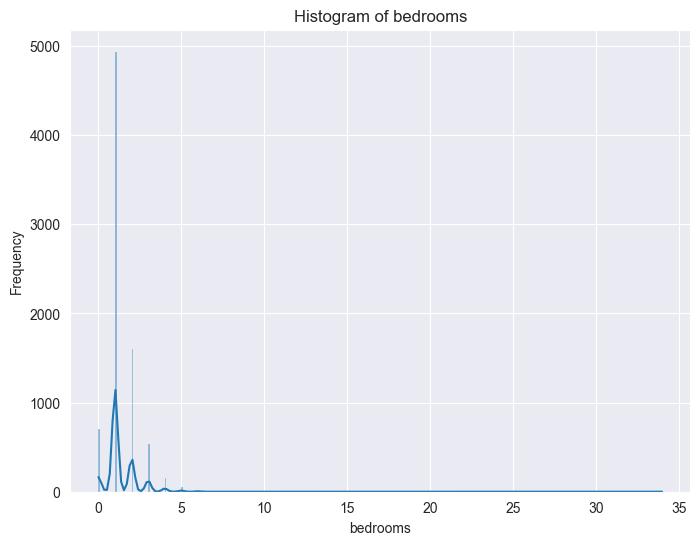

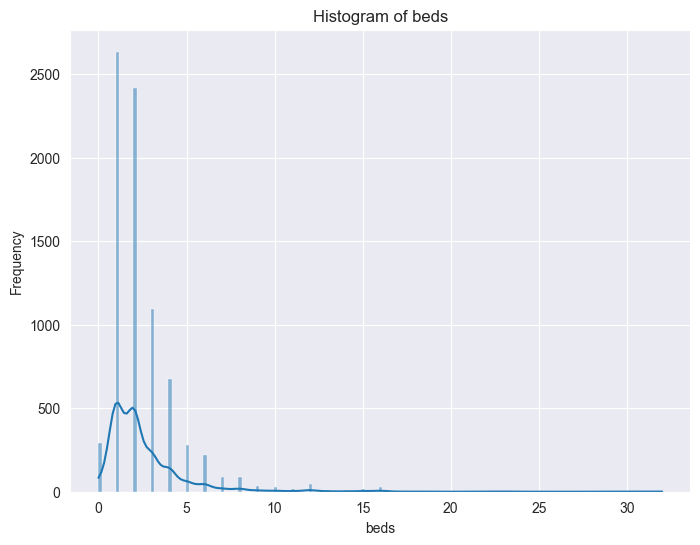

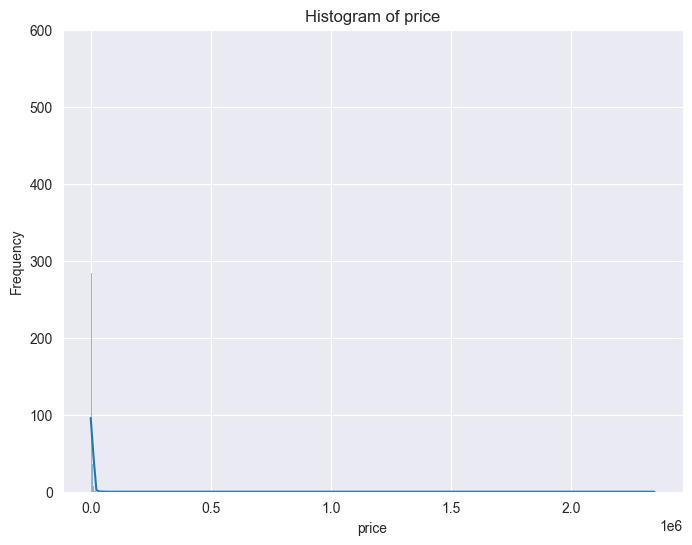

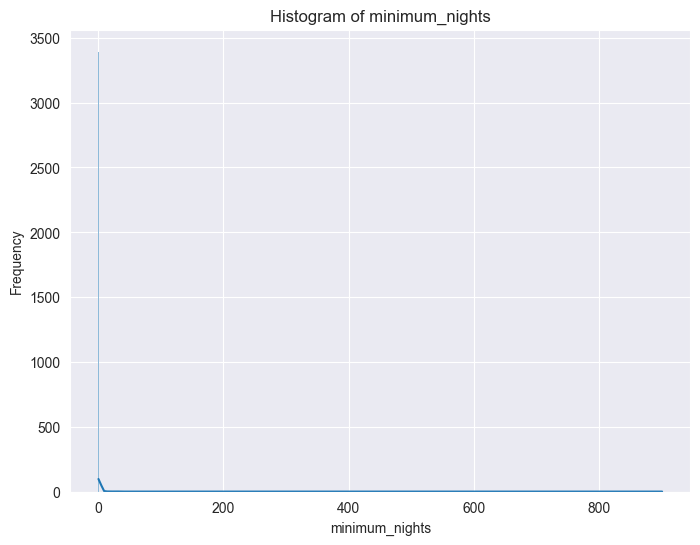

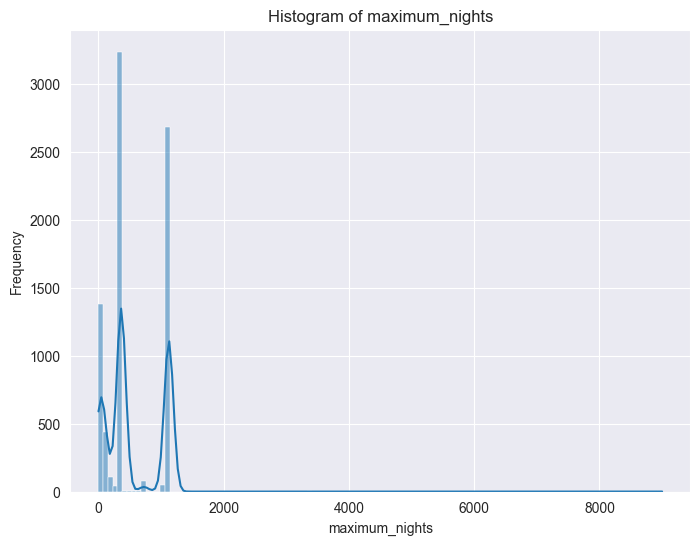

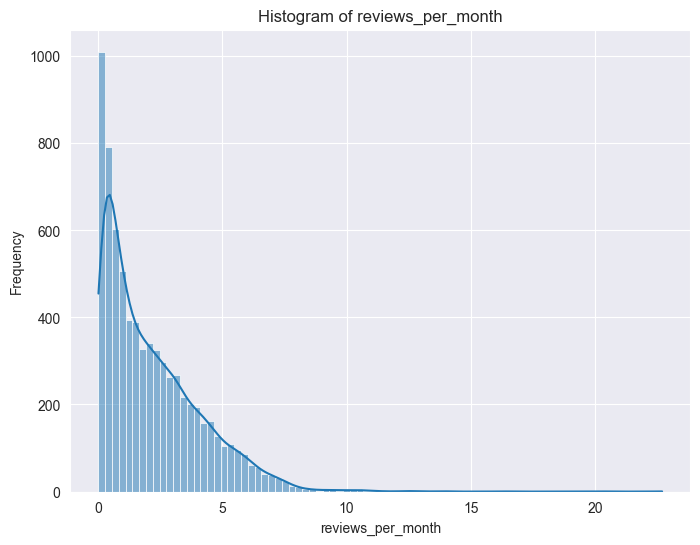

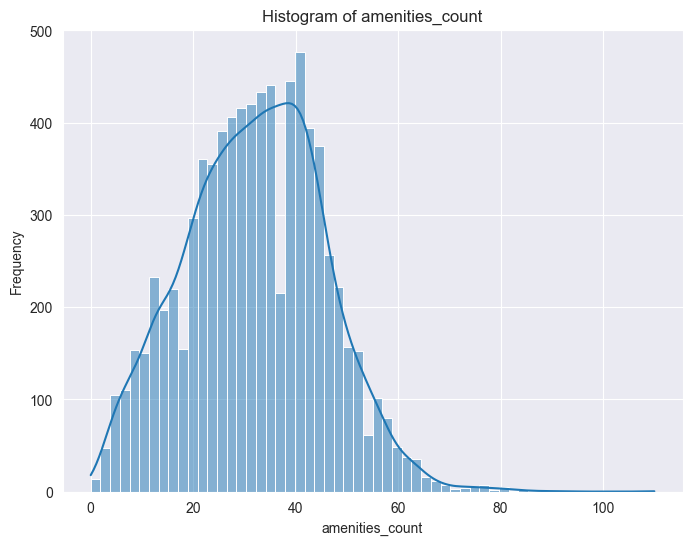

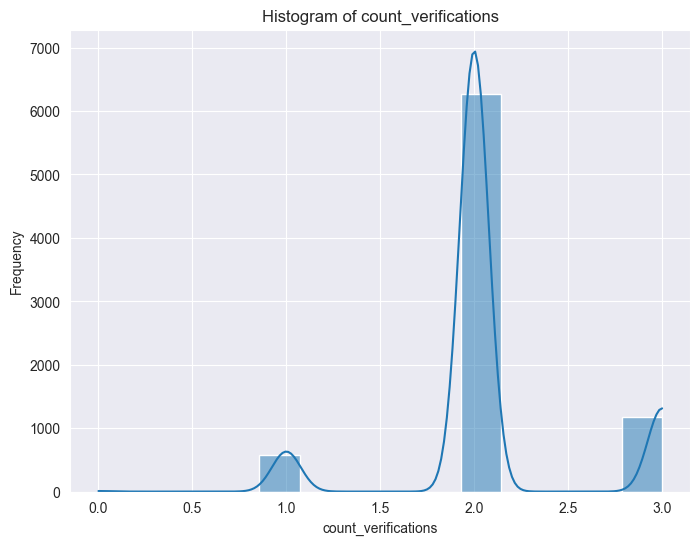

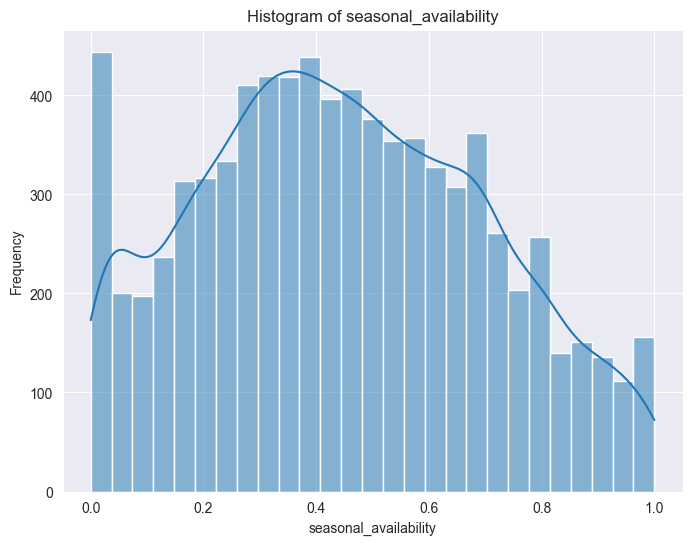

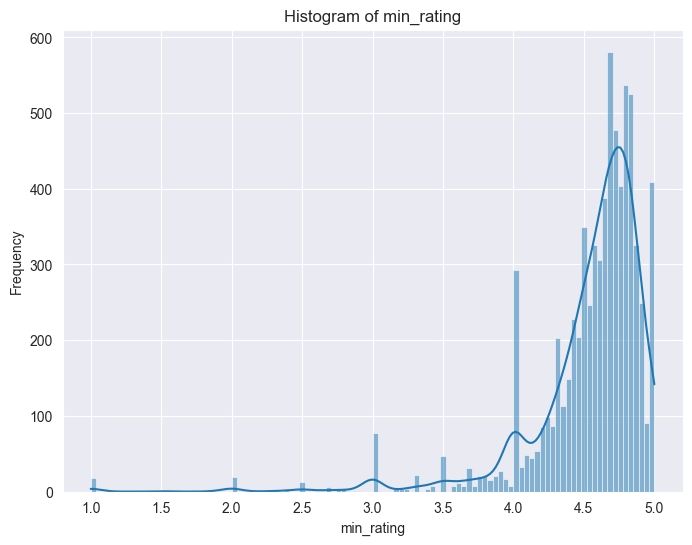

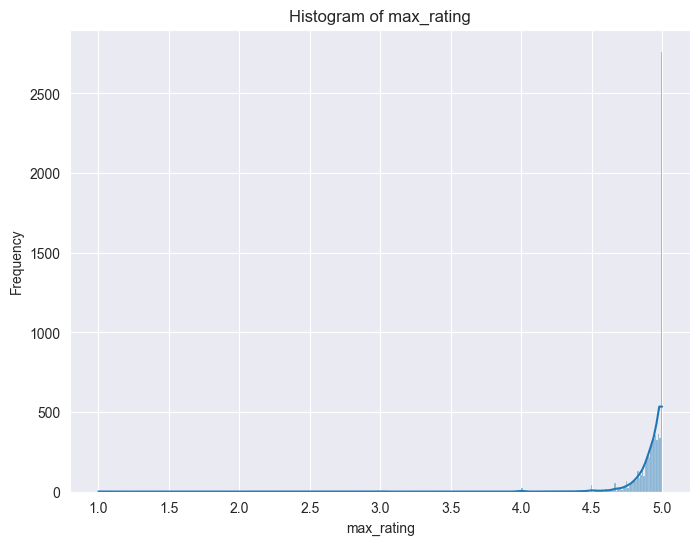

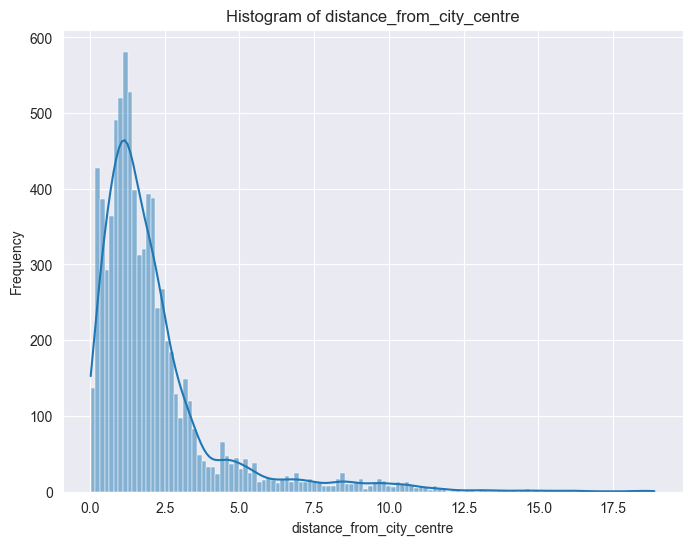

In [490]:
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

[3003 3649 4681 5131 5241 6365 6603 6880 7610]


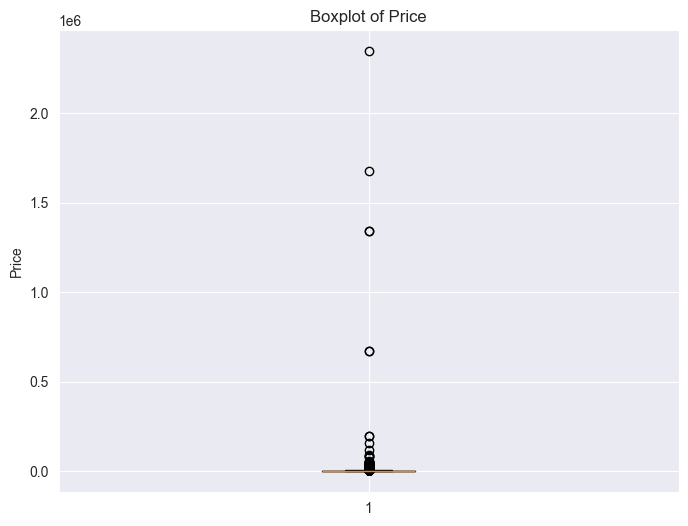

In [491]:
# price

data["price"] = data["price"].astype('int')

from scipy import stats
import numpy as np

# Calculate z-scores
z_scores = stats.zscore(data['price'])
threshold = 3
price_outliers = np.where(np.abs(z_scores) > threshold)[0]

print(price_outliers)

# Create a boxplot for the "price" column
plt.figure(figsize=(8, 6))
plt.boxplot(data["price"])
plt.title("Boxplot of Price")
plt.ylabel("Price")
plt.show()


In [492]:
# Dropping those outliers
outlier_rows = data.iloc[price_outliers]
print(outlier_rows.head())
# data = data[~data.index.isin(price_outliers)]

        host_id host_response_time  host_response_rate  host_acceptance_rate  \
3117  312979402     within an hour                 1.0                  0.98   
3790  408319714                NaN                 NaN                  1.00   
4877  312979402     within an hour                 1.0                  0.98   
5337  103704553                NaN                 NaN                  1.00   
5452  456749240     within an hour                 1.0                  0.92   

      host_is_superhost  host_listings_count  host_has_profile_pic  \
3117                0.0                    4                     1   
3790                0.0                    1                     1   
4877                0.0                    4                     1   
5337                0.0                    1                     1   
5452                1.0                    4                     0   

      host_identity_verified neighbourhood_cleansed        room_type  ...  \
3117                 

In [493]:
# Finding out which other columns are skewed too much

skewness = numeric_columns.apply(lambda x: x.skew())
skew_threshold = 3 

# Identify columns with skewness above the threshold
skewed_columns = skewness[skewness > skew_threshold].index
print(skewed_columns)
# Drop highly skewed columns
#data.drop(columns=skewed_columns, inplace=True)

# Now 'data' contains only columns with skewness below the threshold

Index(['host_listings_count', 'bathrooms', 'bathrooms_text', 'bedrooms',
       'beds', 'price', 'minimum_nights'],
      dtype='object')


count    8029.000000
mean       23.678167
std        69.506577
min         0.000000
25%         2.000000
50%         8.000000
75%        25.000000
max      2260.000000
Name: host_listings_count, dtype: float64
8.0


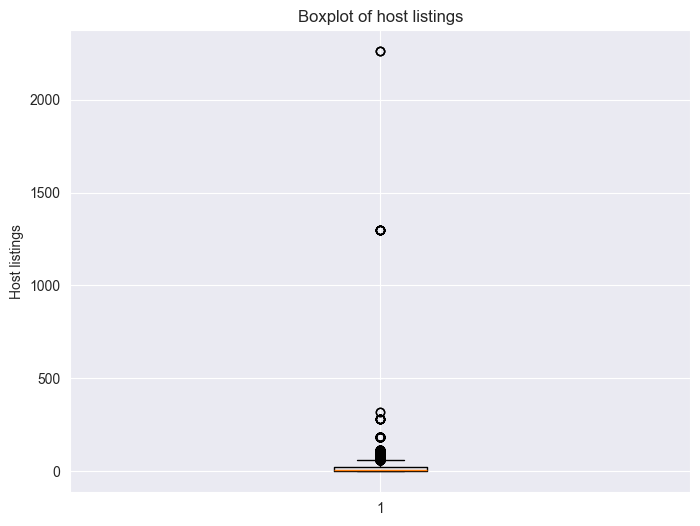

[1834 1835 1836 2001 2479 2480 3595 3881 3891 3921 3961 4344 4345 4646
 4686 5221 5302 5807 6228 6434 7335 7503 7806 7956 7960]


In [494]:
# host_listings_count

print(data["host_listings_count"].describe())
print(data["host_listings_count"].median())

# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(data["host_listings_count"])
plt.title("Boxplot of host listings")
plt.ylabel("Host listings")
plt.show()

# Calculate z-scores
z_scores = stats.zscore(data['host_listings_count'])
threshold = 3
host_listings_outliers = np.where(np.abs(z_scores) > threshold)[0]

print(host_listings_outliers)

outlier_listings = data.iloc[host_listings_outliers]

#Probably are not outliers but truly hosts with many listings - after looking at the statistics, the price range of one host is big, so there is no reason to keep the column

data.drop("host_listings_count", axis=1, inplace=True)


In [495]:
# bathrooms vs bathrooms_text

print(data["bathrooms_text"].isnull().sum())
print(data["bathrooms"].isnull().sum())

#comparing if they are the same
print(data['bathrooms_text'].head(10))
print(data['bathrooms'].head(10))

same_values = data[data["bathrooms_text"] == data["bathrooms"]]
percentage_same = len(same_values) / len(data) * 100
print(percentage_same)

# 99% --> very similar, dropping one with more NaN

data = data.drop('bathrooms_text', axis=1)

12
1
0     1.0
1     1.0
2     1.5
3     1.0
4     1.0
5     1.0
7     1.0
8     1.0
9     1.0
10    1.0
Name: bathrooms_text, dtype: float64
0     1.0
1     1.0
2     1.5
3     1.0
4     1.0
5     1.0
7     1.0
8     1.0
9     1.0
10    1.0
Name: bathrooms, dtype: float64
99.83808693486112


In [496]:
# bedrooms vs beds

print(data["beds"].isnull().sum())
print(data["bedrooms"].isnull().sum())

#comparing if they are the same
print(data['beds'].describe())
print(data['bedrooms'].describe())

data = data.drop("beds", axis=1)

18
9
count    8011.000000
mean        2.559106
std         2.503051
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        32.000000
Name: beds, dtype: float64
count    8020.000000
mean        1.364214
std         1.026833
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        34.000000
Name: bedrooms, dtype: float64


In [497]:
# checking for outliers

# Bedrooms
z_scores = stats.zscore(data['bedrooms'])
threshold = 3
bedrooms_outliers = np.where(np.abs(z_scores) > threshold)[0]

print(bedrooms_outliers)

# Bathrooms
z_scores = stats.zscore(data['bathrooms'])
threshold = 3
bathrooms_outliers = np.where(np.abs(z_scores) > threshold)[0]

print(bathrooms_outliers)

# no outliers

[]
[]


In [498]:
# minimum nights

z_scores = stats.zscore(data['minimum_nights'])
threshold = 3
minnights_outliers = np.where(np.abs(z_scores) > threshold)[0]

print(minnights_outliers)

print(data["minimum_nights"].iloc[minnights_outliers])
print(data.iloc[minnights_outliers])

# a lot of NaN in these rows --> drop
#data = data[~data.index.isin(minnights_outliers)]

[ 191  245  290  444  448  493  585  708  765  766  904 1072 1301 1325
 1330 1483 1742 1791 1911 2225 2279 2570 3070 3081 3510 3533 3662 3729
 3742 3743 3888 3903 3935 4737 4926 5314 5357 5805 5838 5916 6938]
217     120
272     300
324     365
487      61
491      61
539     200
635     365
758     160
818     365
819     300
961      62
1134     89
1367     61
1392     61
1397     60
1552    140
1818    360
1868     81
1989     60
2310    180
2366    200
2669    180
3186    300
3197    300
3644    180
3670     90
3804     61
3879    150
3893    150
3894    150
4049    360
4064    270
4098     90
4934     62
5127     60
5541    200
5587    900
6048    360
6082     60
6170    100
7233     90
Name: minimum_nights, dtype: int64
        host_id  host_response_time  host_response_rate  host_acceptance_rate  \
217     8988481        within a day                1.00                  0.00   
272     5248577                 NaN                 NaN                   NaN   
324     9260498      

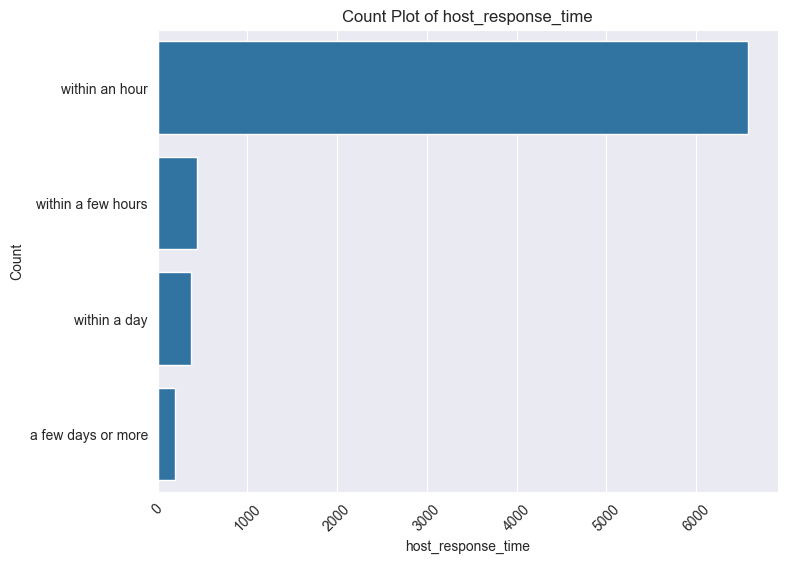

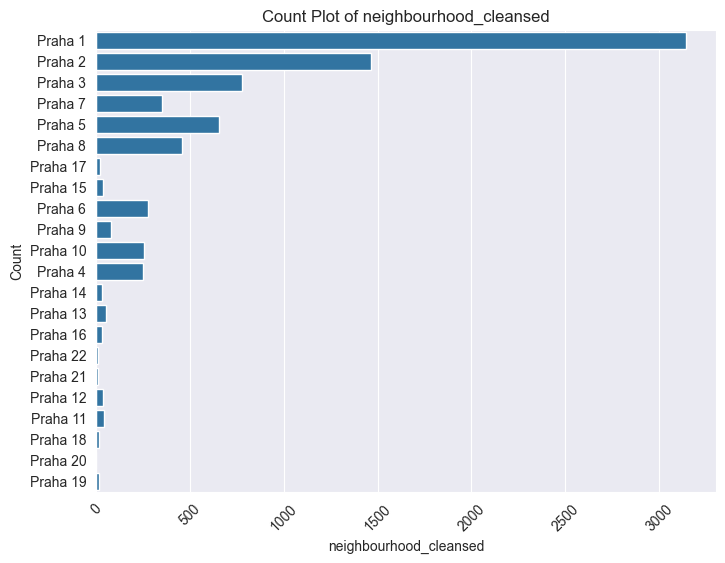

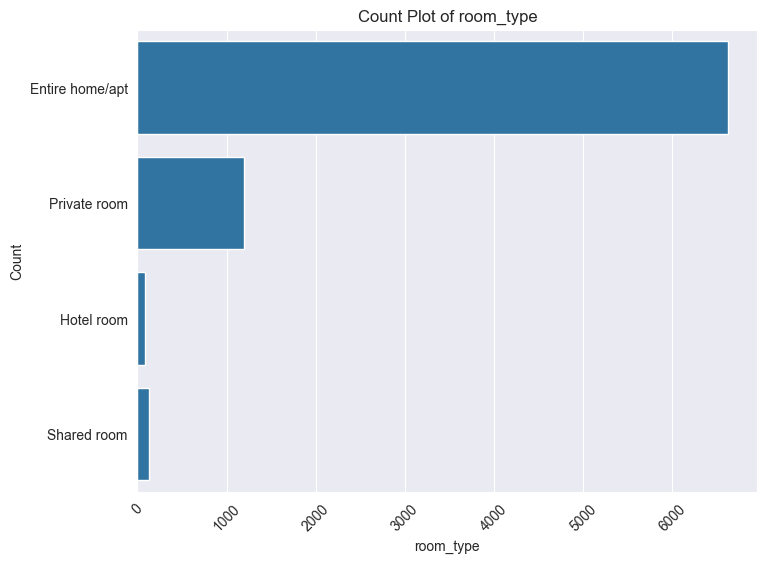

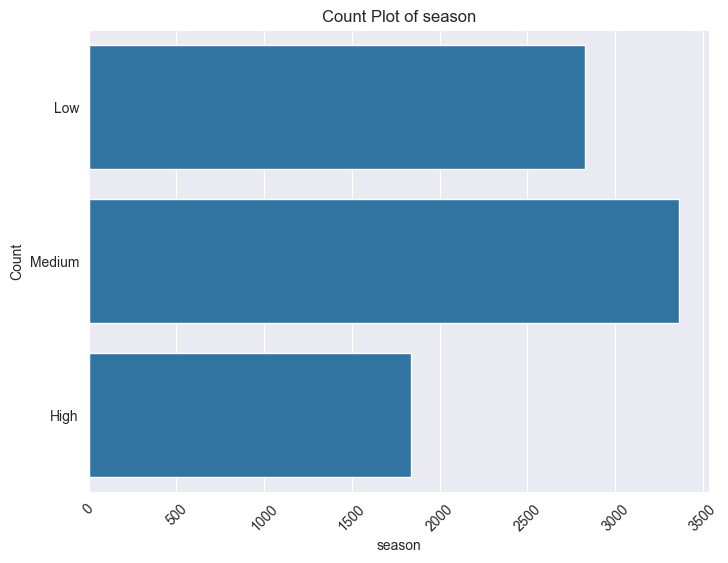

In [499]:
# visualising categorical data

for column in categorical_columns.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data[column])
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

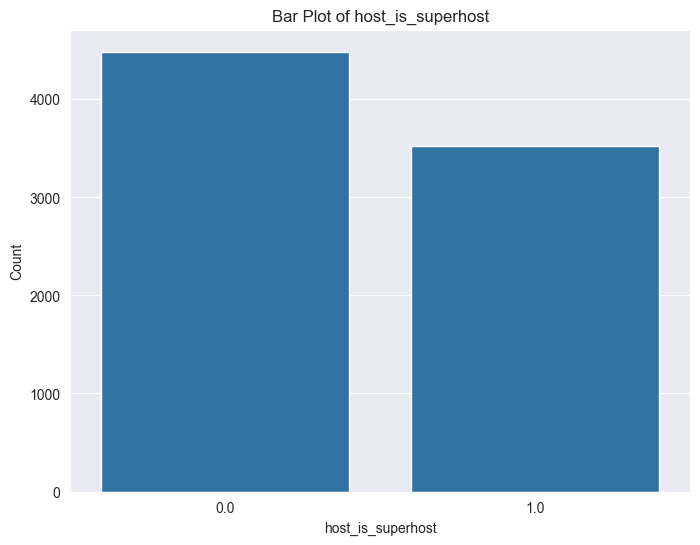

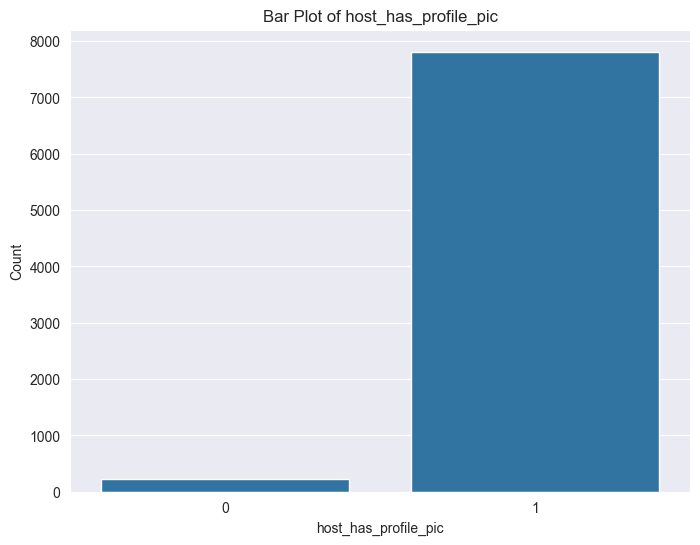

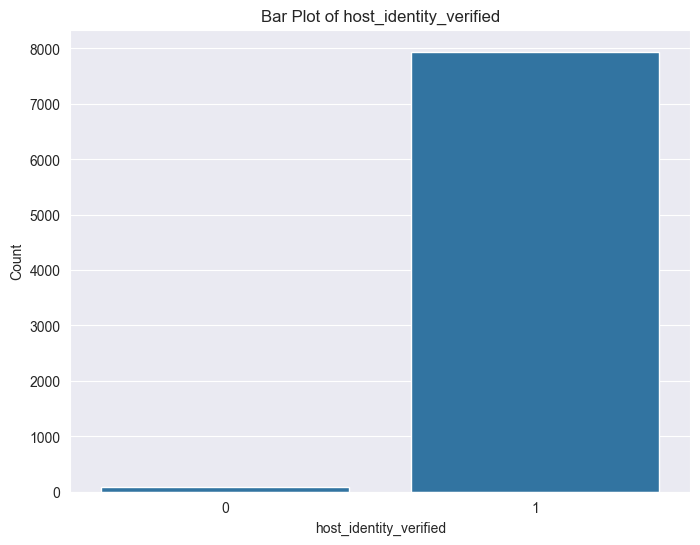

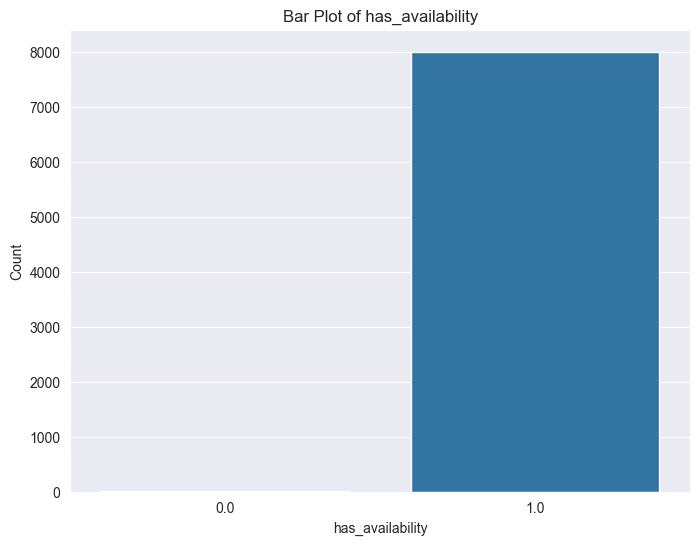

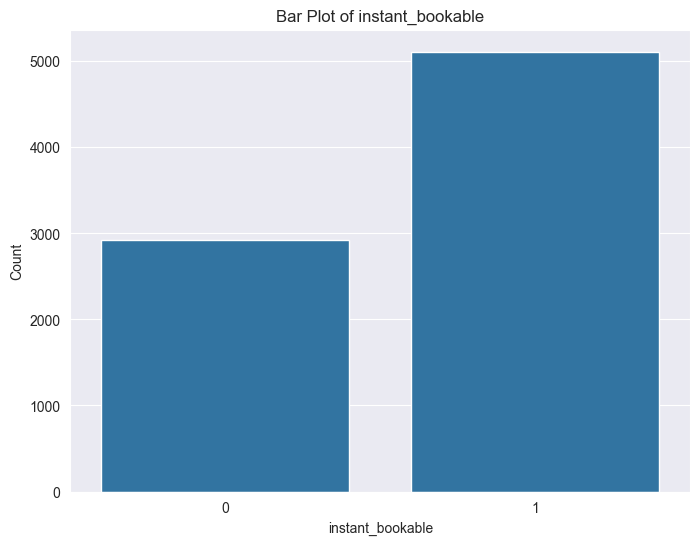

In [500]:
# Visualising binary columns

for column in binary_columns:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=data[column].value_counts().index, y=data[column].value_counts())
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [501]:
# Dropping binary columns with significant imbalance

imbalance = ["has_availability", "host_identity_verified", "host_has_profile_pic"]
data.drop(imbalance, axis=1,inplace=True)

In [502]:
# host_is_superhost to int

data["host_is_superhost"].isnull().sum()
data["host_is_superhost"].fillna(0, inplace=True)
data["host_is_superhost"] = data["host_is_superhost"].astype(int)

/var/folders/zh/ldm1m0cx0v9cw1816rqb1mgw0000gn/T/ipykernel_1454/69590848.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["host_is_superhost"].fillna(0, inplace=True)


In [503]:
data.dtypes

host_id                         int64
host_response_time           category
host_response_rate            float64
host_acceptance_rate          float64
host_is_superhost               int64
neighbourhood_cleansed       category
room_type                    category
accommodates                    int64
bathrooms                     float64
bedrooms                      float64
price                           int64
minimum_nights                  int64
maximum_nights                  int64
instant_bookable                int64
reviews_per_month             float64
amenities_count                 int64
count_verifications             int64
seasonal_availability         float64
season                       category
min_rating                    float64
max_rating                    float64
distance_from_city_centre     float64
dtype: object

In [504]:
# export

data.to_pickle("final_data.pck")